In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read the input files and read the top few lines #
match_df = pd.read_csv("matches.csv")
score_df = pd.read_csv("deliveries.csv")
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [3]:
# lets get some basic stats
print('Number of matches played so far: ', match_df.shape[0])
print('Number of seasons : ', len(match_df.season.unique()))

('Number of matches played so far: ', 577)
('Number of seasons : ', 9)


##### Number of matches in each session:
let us first look at the number of matches played per session

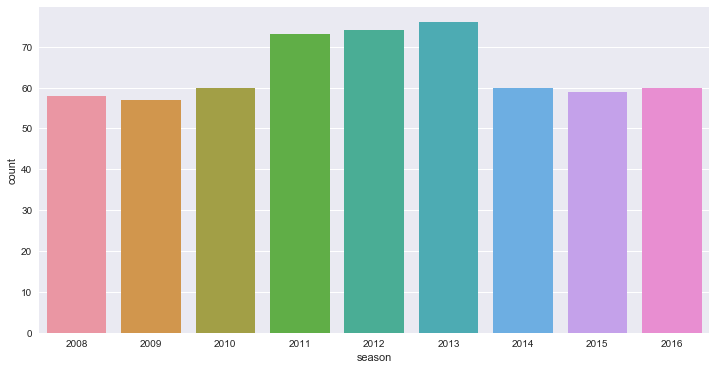

In [4]:
# number of matches in each session
plt.figure(figsize=(12, 6))
sns.countplot(x='season', data=match_df)
plt.show()

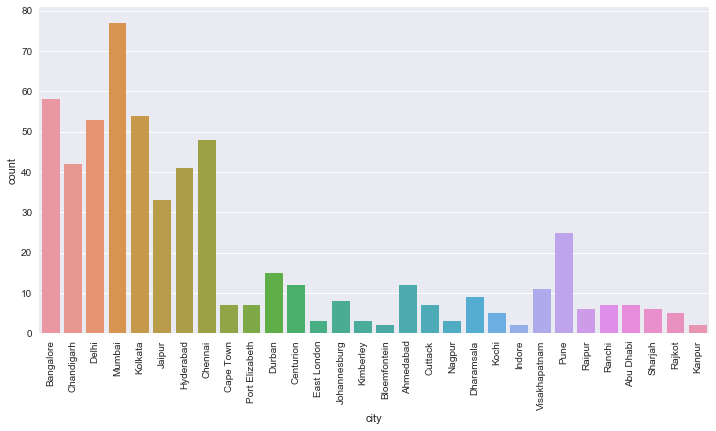

In [5]:
# number of matches in each city
plt.figure(figsize=(12, 6))
sns.countplot(x='city', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

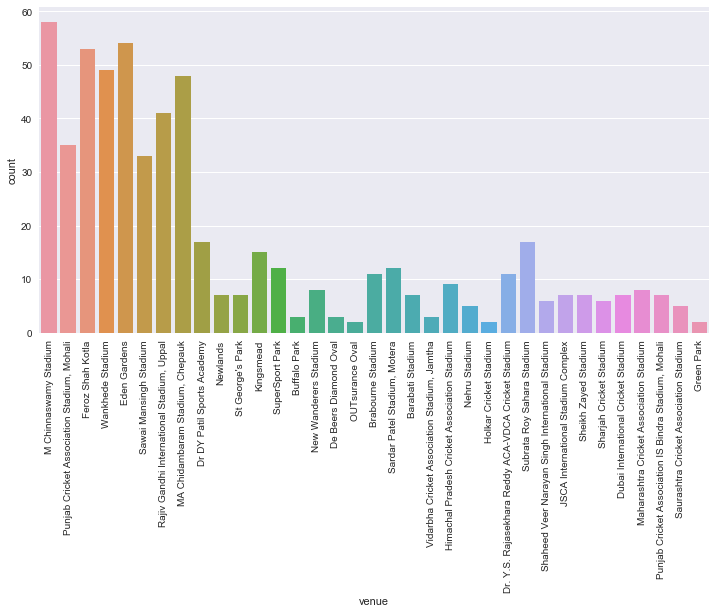

In [6]:
# number of matches in each venue
plt.figure(figsize=(12, 6))
sns.countplot(x='venue', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

'M Chinnaswamy Stadium' - most number of mathces, followed by 'Eden Gardens'

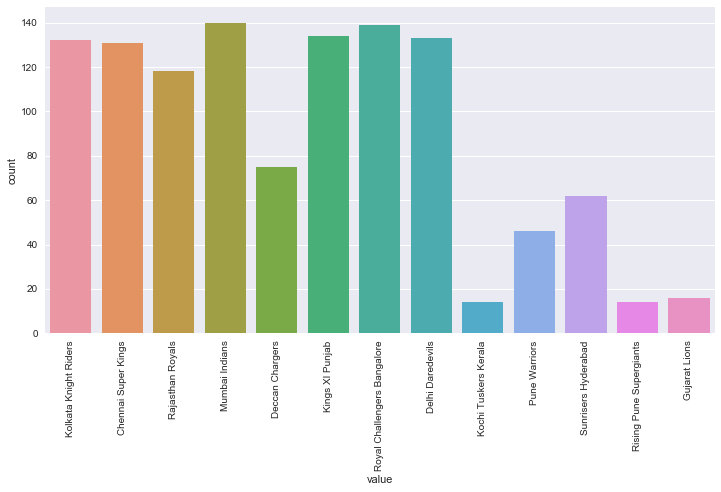

In [7]:
# number of matches played by each team
temp_df = pd.melt(match_df, id_vars=['id', 'season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(12, 6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

'MI' lead the pack with most number of matches played followed by 'RCB'.

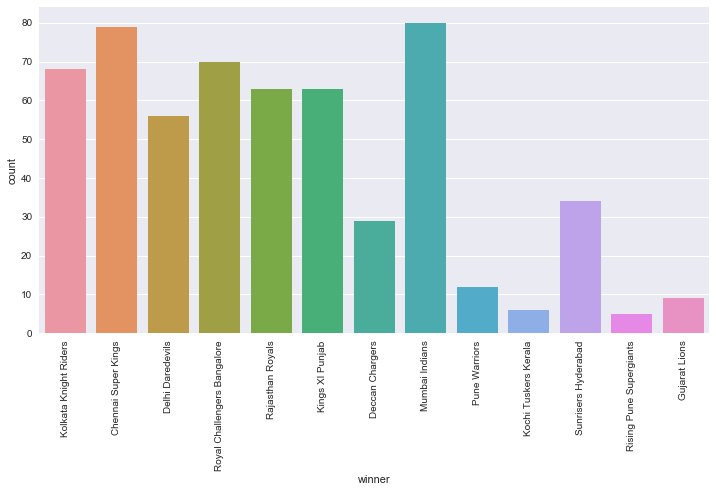

In [8]:
# number of wins per team
plt.figure(figsize=(12, 6))
sns.countplot(x='winner', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

MI leads the pack followed by CSK

In [9]:
# champions each season
temp_df = match_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad


In [10]:
# toss decision
# lets see the toss decisions taken so far
temp_series = match_df.toss_decision.value_counts()
temp_series

field    315
bat      262
Name: toss_decision, dtype: int64

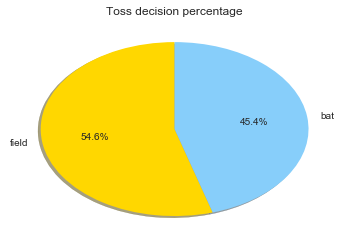

In [11]:
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum()) * 100))
colors = ['gold', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Toss decision percentage')
plt.show()

almost 55 % of toss decisions are made to field first. Now lets see how this decision varied over time

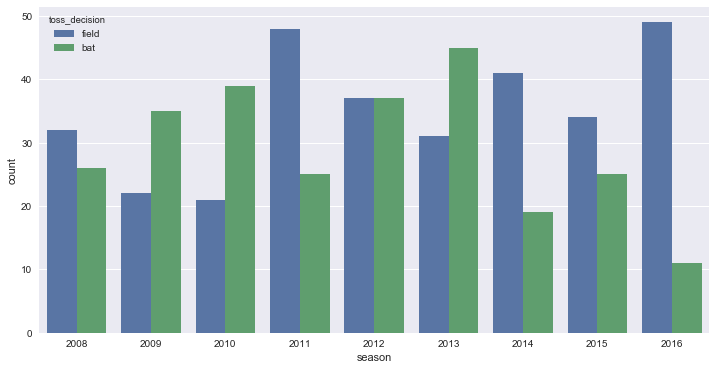

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='season', hue='toss_decision', data=match_df)
plt.show()

during the initial years, teams wanted to bat first, but most of the toss decisions are to field first lately.
since there is very strong trend towards batting second.
Lets see the winning % of teams field first.

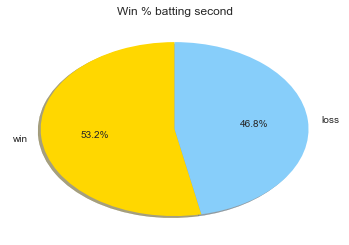

In [13]:
num_of_wins = (match_df.win_by_wickets > 0).sum()
num_of_loss = (match_df.win_by_wickets == 0).sum()

labels = ['win', 'loss']
total = float(num_of_wins + num_of_loss)

sizes = [(num_of_wins / total) * 100, (num_of_loss / total) * 100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Win % batting second')
plt.show()

so percentage of times teams batting second has won is 53.2. Now let us split this by year and see the distribution

c:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


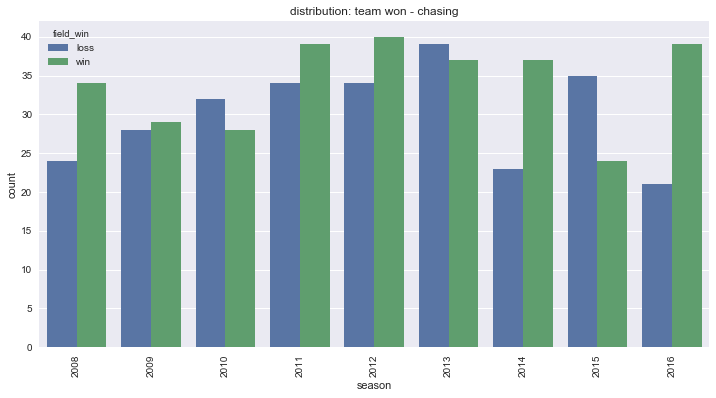

In [14]:
match_df['field_win'] = 'win'
match_df['field_win'].loc[match_df['win_by_wickets'] == 0] = 'loss'
plt.figure(figsize=(12, 6))
sns.countplot(x='season', hue='field_win', data=match_df)
plt.xticks(rotation='vertical')
plt.title('distribution: team won - chasing')
plt.show()

number of wins chasing is quite high in the last season (2016), in 2015 teams batting first has won more than chasing

##### Top players of the match


In [15]:
temp_series = match_df.player_of_match.value_counts()[:10]
temp_series

CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
RG Sharma         13
SK Raina          13
MEK Hussey        12
G Gambhir         12
MS Dhoni          12
AM Rahane         12
Name: player_of_match, dtype: int64

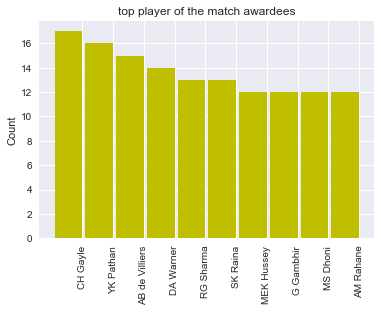

In [16]:
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel('Count')
ax.set_title('top player of the match awardees')
plt.show()

CH Gayle is the top player of the match in all the seasons in IPL

##### Top Umpires

   id variable      value
0   1  umpire1  Asad Rauf
1   2  umpire1  MR Benson
2   3  umpire1  Aleem Dar
3   4  umpire1   SJ Davis
4   5  umpire1  BF Bowden


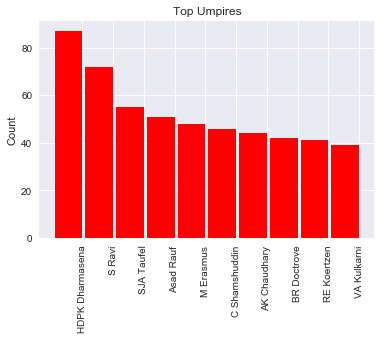

In [17]:
temp_df = pd.melt(match_df, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
print(temp_df.head())
temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='r')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
plt.show()

##### how lucky are the toss winning teams

In [18]:
match_df['toss_winner_is_winner'] = 'no'
match_df['toss_winner_is_winner'].loc[match_df.toss_winner == match_df.winner] = 'yes'
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,field_win,toss_winner_is_winner
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,loss,no
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,loss,yes
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,win,no
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN,win,no
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,win,no


In [19]:
temp_series = match_df.toss_winner_is_winner.value_counts()
temp_series

yes    291
no     286
Name: toss_winner_is_winner, dtype: int64

In [20]:
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum()) * 100))
sizes

array([ 50.43327556,  49.56672444])

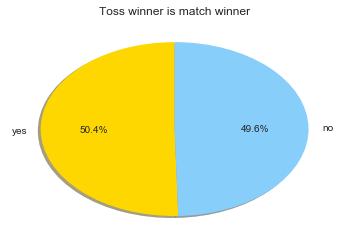

In [21]:
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Toss winner is match winner')
plt.show()

It is not the case it seems. There is a 50-50 chance for both the teams.

Lets see how winning the toss works for a team.

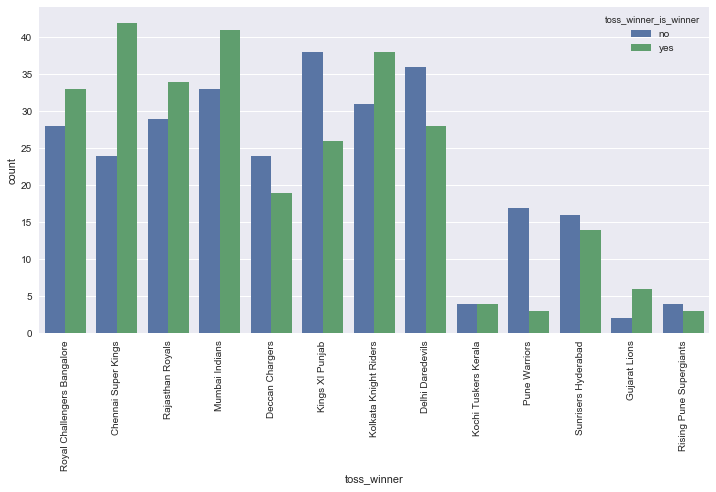

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

Winning the toss is good for CSK, a good probability that they will win.

In [23]:
print('Total data - Scoreboard', len(score_df))
score_df.head()

('Total data - Scoreboard', 136598)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


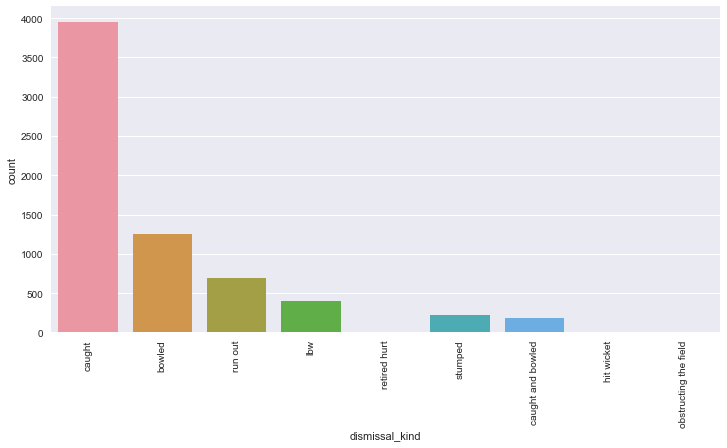

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='dismissal_kind', data=score_df)
plt.xticks(rotation='vertical')
plt.show()